# Example 1

In this example, we will demonstrate how to use `cpnet` in stages using a small network. To get started, we need some packages. First, `networkx` is needed to pass network data to `cpnet`. Second, `numpy` is also needed for array manipulation. Lastly, we need matplotlib to visualize the result. 

In [1]:
%load_ext autoreload
%autoreload 2
import cpnet
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Next, we will load a network contained in `networkx` package, which can be loaded as follows:

In [11]:
G = nx.karate_club_graph()

If you have a network in an adjacency matrix or edge list format, you can easily convert it to `networkx` Graph object. 
Please see `networkx` documentation for details.

Now, let us detect core-periphery structure in the karate club network. We demonstrate an algorithm named the Borgatti-Everett (BE) algorithm, which is the first and widely used algorithm for detecting core-periphery in networks. We do this by the following two steps. First, we create an instance of the BE algorithm:

In [47]:
alg = cpnet.BE()

Then, we pass the networkx graph object `G` to `detect` method of the instance:

In [48]:
alg.detect(G)

All done. We can get the results with two methods, `get_coreness` and `get_pair_id` :

In [49]:
x = alg.get_coreness()  # Get the coreness of nodes
c = alg.get_pair_id()  # Get the group membership of nodes

Let us explain `x` for a moment. 

`x` is a python dictionary composed of keys and values. The keys indicate the node labels, and values indicate a *coreness*. The coreness ranges in [0,1], where a larger value indicates a stronger affiliation to the core. For example, the detected `x` looks like

In [50]:
print(x)

{0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 1, 33: 1}


where `x[i]=1` or `x[i]=0` means that node `i` belongs to a core or a periphery, respectively. In BE algorithm, a node belongs to either a core and a periphery. Therefore, `x[i]` takes 0 or 1.

We can visualize the network by passing `x` and `c` to `draw` method:  

100%|██████████| 300/300 [00:00<00:00, 20810.24it/s]

BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


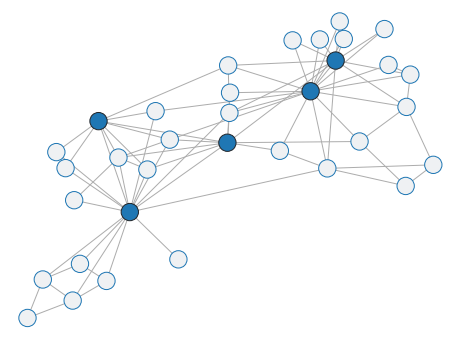

In [51]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax)

The filled and open circles indicate the detected core and periphery, respectively. 

The BE algorithm partition nodes into a core and a periphery. Other algorithms find continuous spectrum of coreness between a core and a periphery. An well-known method to this end is Rombach's algorithm. To see the difference, let us apply Rombach's algorithm to the karate club network.

In [61]:
alg = cpnet.Rombach()
alg.detect(G)
x = alg.get_coreness() 
c = alg.get_pair_id()

We note that the corness value varies between 0 and 1. 

In [63]:
print(x)

{0: 0.23148148148148145, 1: 0.19444444444444442, 2: 0.8214285714285714, 3: 0.10185185185185185, 4: 0.027777777777777776, 5: 0.07407407407407407, 6: 0.037037037037037035, 7: 0.12037037037037036, 8: 0.8571428571428571, 9: 0.1111111111111111, 10: 0.05555555555555555, 11: 0.009259259259259259, 12: 0.06481481481481481, 13: 0.2222222222222222, 14: 0.17592592592592593, 15: 0.2037037037037037, 16: 0.0, 17: 0.018518518518518517, 18: 0.14814814814814814, 19: 0.09259259259259259, 20: 0.16666666666666666, 21: 0.046296296296296294, 22: 0.1388888888888889, 23: 0.8928571428571428, 24: 0.08333333333333333, 25: 0.12962962962962962, 26: 0.15740740740740738, 27: 0.24074074074074073, 28: 0.18518518518518517, 29: 0.7857142857142857, 30: 0.25, 31: 0.21296296296296297, 32: 0.9285714285714286, 33: 0.9642857142857143}


We can visualize the continuous spectrum of coreness values by 

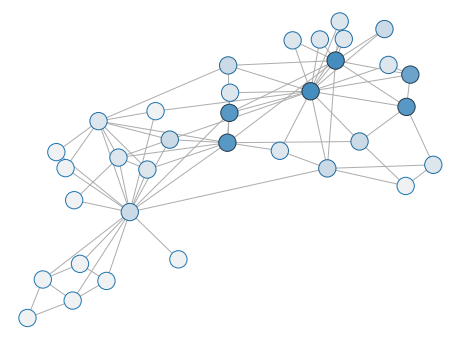

In [65]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax, pos = pos)

Darkness of the circles indicate the coreness of the ndoe. One can see that nodes away from the core nodes tend to have a lower coreness value.

So far, we consider that a network has a single core and a single periphery, with or without some sub-peripheral nodes in between. However, a network may have multiple groups, where each group is a pair of a core and a periphery. 

Does the karate club network have multiple core-periphery pairs? To see this, we use KM algorith, an algorithm for finding core-periphery pairs in networks. 

In [66]:
kmconfig = cpnet.KM_config()
kmconfig.detect(G)

Get the results by 

In [68]:
c = kmconfig.get_pair_id()
x = kmconfig.get_coreness()

Here `c` is used to store the group membership of nodes. Specifically, `c` is a python dictionary composed of keys and values. The keys indicate the node labels, and the values are integers indicating the membership of the node. 
For example, `c[i]` indicates the ID of the group to which node `i` belongs. 

In [70]:
print(c)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 2, 9: 0, 10: 1, 11: 0, 12: 0, 13: 0, 14: 2, 15: 2, 16: 1, 17: 0, 18: 2, 19: 0, 20: 2, 21: 0, 22: 2, 23: 2, 24: 3, 25: 3, 26: 2, 27: 2, 28: 3, 29: 2, 30: 2, 31: 3, 32: 2, 33: 2}


We can visualize the results in the same as for BE and Rombach algorithms:

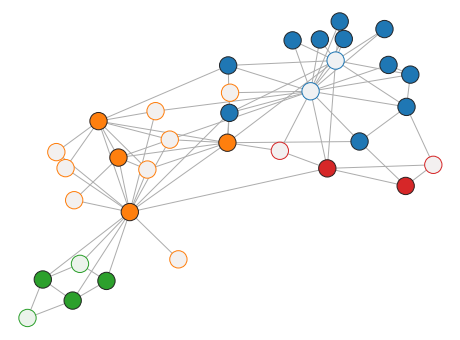

In [72]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, _ = cpnet.draw(G, c, x, ax, pos=pos)

The color of nodes indicate the membership of nodes. The KM algorithm finds multiple core-periphery pairs.

In this example, we demonstrate three algorithms of different types, BE, Rombach and KM algorithms. These algorithms find different core-periphery structure because they aim for different types of core-periphery structure.
Despite its differece, we can use the algorithms in almost the same code, i.e., make an instance, pass a graph, and retrieve results, which is what `cpnet` is designed for. 
Please find other algorithms in Readme.